# 0. Preparation!

Let's train our data science skills!

In [20]:
#First, let's load our libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Now, time to move to exploratory analysis

---
# 1. Exploratory analysis of our training dataset

## 1.1 Features Dictionary

In [17]:
variables_dict = {'Variable': ['Survival',
                              'Pclass',
                              'Sex',
                              'Age',
                              'SibSp',
                              'Parch',
                              'Ticket',
                              'Fare',
                              'Cabin',
                              'Embarked',
                              'Name',
                              'PassengerId'],
                 'Definition': ['Survival',
                                'Ticket class',
                                'Sex',
                                'Age in years',
                                '# of siblings / spouses aboard the Titanic',
                                '# of parents / children aboard the Titanic',
                                'Ticket number',
                                'Passenger fare',
                                'Cabin number',
                                'Port of Embarkation',
                                'Name',
                                'PassengerId'],
                  'Key': ['0 = No, 1 = Yes',
                          '1 = 1st, 2 = 2nd, 3 = 3rd',
                          '',
                          '',
                          '',
                          '',
                          '',
                          '',
                          '',
                          'C = Cherbourg, Q = Queenstown, S = Southampton',
                          '',
                          '']}

In [18]:
variables = pd.DataFrame.from_dict(variables_dict)
variables

,Variable,Definition,Key
0,Survival,Survival,"0 = No, 1 = Yes"
1,Pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,Sex,Sex,
3,Age,Age in years,
4,SibSp,# of siblings / spouses aboard the Titanic,
5,Parch,# of parents / children aboard the Titanic,
6,Ticket,Ticket number,
7,Fare,Passenger fare,
8,Cabin,Cabin number,
9,Embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


Nice! Now we have a dictionary for our variables that we can check anytime by calling our dataframe *variables*

## 1.2 Train dataset analysis

In [14]:
#Let's start by analysing each column
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


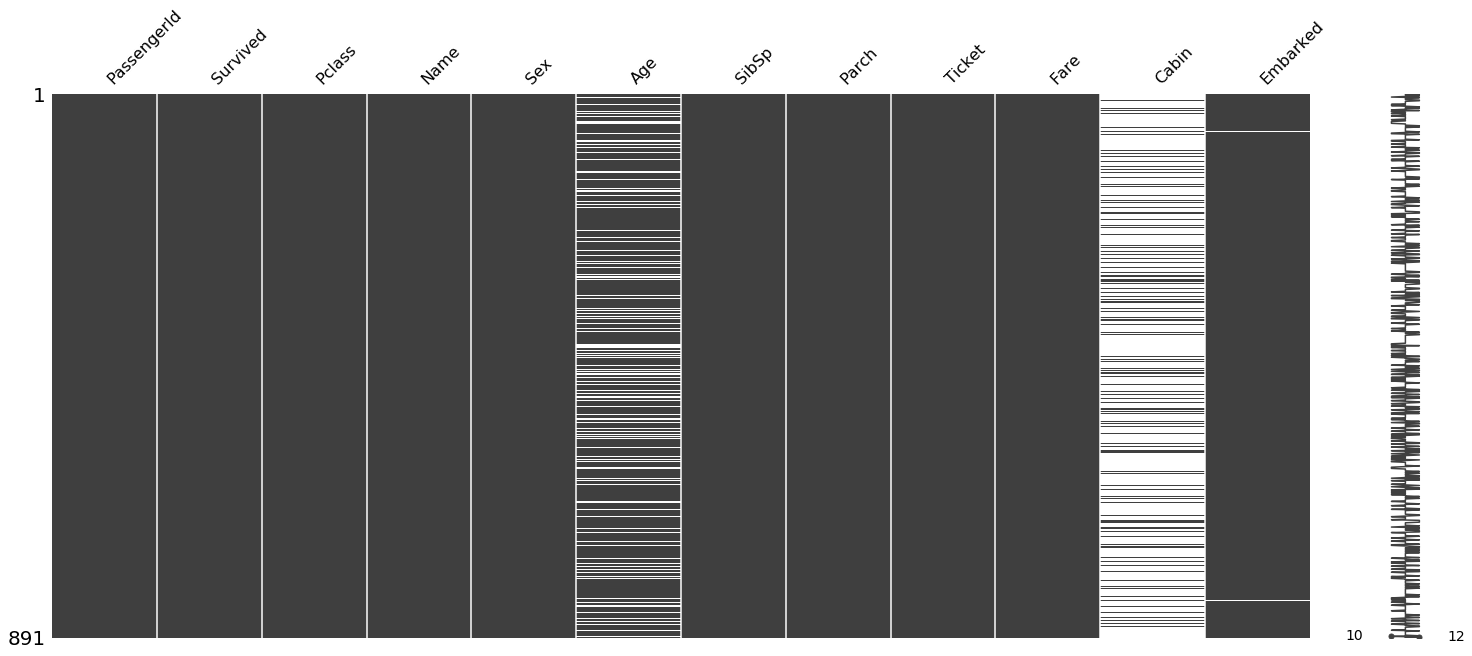

In [23]:
msno.matrix(train)

In [29]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Lindell, Mr. Edvard Bengtsson",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


Cool! Time to dive in each variable of our train data:  
**PassengerId**: An unique value from 1 to 891. Nothing unusual, just a regular index  
**Survived**: Dummy: The variable we want to predict (our y)! It's a numeric dummy (1 survided, 0 didn't). We can see from the mean of this variable that 38.38% of the passengers survived  
**Pclass**: Ordinal categorical: Talks about the type of ticket class the passenger has (1 to 3, high to low). We should create dummies for this one so our models don't think it's a regular numerical variable  
**Name**: Just the name of the passenger. Probably won't be useful, unless we want to create family clusters or something like that  
**Sex**: Categorical: male and female. Here we can see we have more men (64.76%) aboard than women  
**Age**: Numerical: Ranging from 0.42 to 80, here things start to get interesting. We have some missing dat (177 to be exact). We will go further on this one to check solutions to fill these valeus (we cannot drop these observations, they are almost 20% of our data and it's probably very important for our model)  
**SibSp**: Numerical, ranging from 0 to 8. Number of siblings/spouses aboard. Mean is around 0.52, with std on 1.1.  
**Parch**: Numerical, ranging from 0 to 6. Number of parents/children aboard. Mean ir around 0.38 with std on 0.8. From this variable and sibsp, we can see we have more people aboard with the relationship siblings/spouses than parent/children. We can see that when we analyze this by looking at the age and analyze how many children we have aboard  
**Ticket**: Ticket number ID. It's worth to notice that we have some repetitions on the ID, which could mean the same ticket ID has been used by more than one person. This could happen with the crew, for instance, uses the same ticket ID to get aboard or if we have falsifications. We can see that by checking the profiles of the same ticket ID are convergent or divergent  
**Fare**: Price paid for the tickets, rainging from 0 (probably the crew or some kind of error) and 512.3. Mean is around 32, with std of 49.7  
**Cabin**: Cabin where the passenger is allocated. We have 147 unique value, which gives us an average of 6.06 passengers per cabin.  
**Embarked**: From which port the passenger has embarked. Here we have 3 distintics ports *C = Cherbourg, Q = Queenstown, S = Southampton*. Here is the description from [wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic) of these ports (data science is all about knowing well your data. So you should always get deep on your variables):

*After leaving Southampton [England] on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York.*

So, the city that the Titanic departs is Southhampton, then it goes to Cherbourg, Queenstown and finally heads to NY where it hits an iceberg.

Great! Now let's make some visualizations!

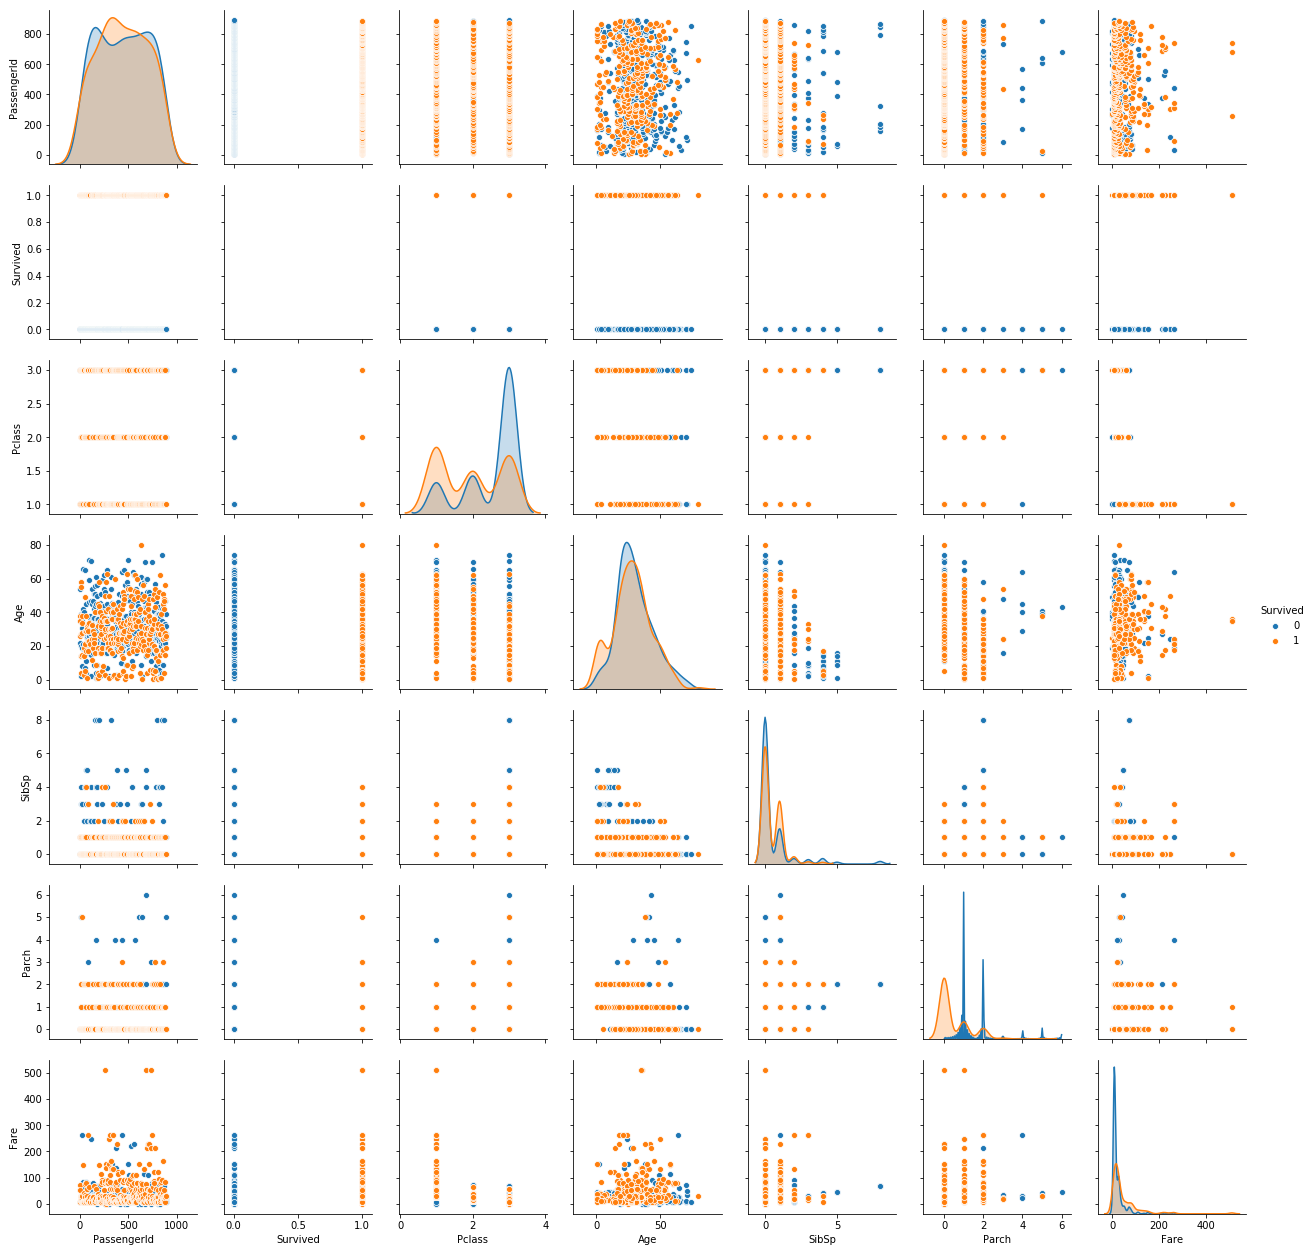

In [102]:
sns.pairplot(train, hue='Survived', diag_kind="auto" )

Here we have our numerical data plotted one against the other. Colors are dividing who survived and who died: Blue = 0 and Orange = 1  

Hypothesis:
- **a.** Higher the Pclass, higher the survival rate --> This feature seems to be a powerful to decide whether the passenger survives or don't. By its histogram, 1st and 2nd classes survives more than the 3rd (which dies the most). 
- **b.** Younger passengers survive more --> 'Women and children first!' Says the movie. Well, by the histogram, we can see kids have a better survival rate. We will check later if that applies to sex too
- **c.** Parch: Insteresting enough, all people without parental relationship aboard have a higher survival frequency than the ones that does have. Hmmm, my intuition would say the opposite. Maybe the pairplot chart is not responding well to our hue condition
- **d.** Fare seems to have a distribution with left skewness. If we use type of linear regression, we should pass a log into the variable to have better results

#### Hypothesis **c**

In [88]:
train[(train['Survived'] == 1)]['Parch'].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [89]:
train[(train['Survived'] == 0)]['Parch'].value_counts()

0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64

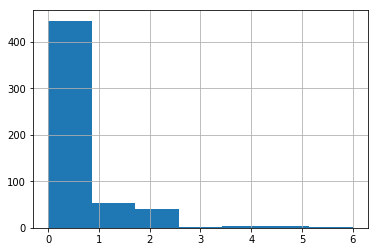

In [97]:
train[(train['Survived'] == 0)]['Parch'].hist(bins=7)

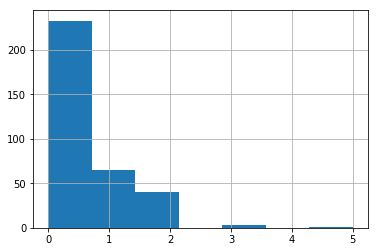

In [93]:
train[(train['Survived'] == 1)]['Parch'].hist(bins=7)

#### Hypothesis **d**

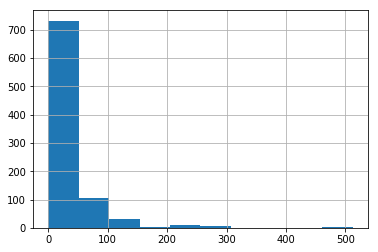

In [103]:
train['Fare'].hist()

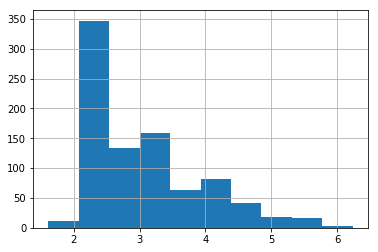

In [106]:
np.log1p(train[train['Fare']>0]['Fare']).hist()